## Kwadratury Gaussa 

#### Zadanie 1
Zaimplementuj całkowanie metodą Gaussa-Legendre stopnia 2-5.

Wyznaczyć wartości całek dla funkcji:

- $f(x) = 3x^3 - 1$ 
- $f(x) = 2 * x^2$
- $f(x) = 4*sin(x)$ 

Oczywiście, oblicz dokładne wartości całek oznaczonych! Porównać dokładność uzyskanych rezultatów z dokładnym wynikiem oraz z kwadraturami z poprzedniego ćwiczenia.

Integral in range [-1,1]


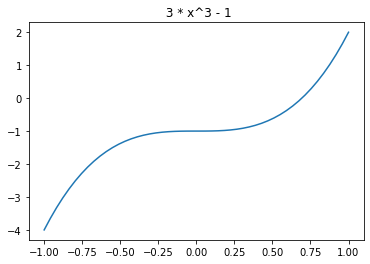

Value counted with Rectangle method -->  -2.0000000000000004
Value counted with Trapeze method -->  -2.0000000000000004
Value counted with Simpson method -->  -2.0486286933333338
Value counted with Gauss-Legendre method with different orders:
	 2  --> -2.0
	 3  --> -2.0
	 4  --> -2.0
	 5  --> -2.0000000000000004
Actual value --> -2.0
Estimating errors:
For Rectangle method 2.220446049250313e-16
For Trapeze method 2.220446049250313e-16
For Simpson method 0.024314346666666875
For Gauss-Legendre method with different orders:
	 2  --> 0.0
	 3  --> 0.0
	 4  --> 0.0
	 5  --> 2.220446049250313e-16


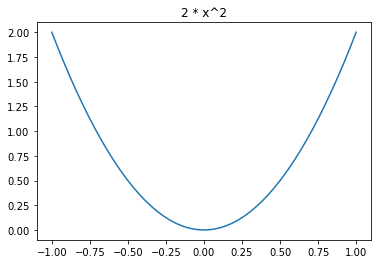

Value counted with Rectangle method -->  1.3344
Value counted with Trapeze method -->  1.3344
Value counted with Simpson method -->  1.2821120000000001
Value counted with Gauss-Legendre method with different orders:
	 2  --> 1.3333333333333333
	 3  --> 1.333333333333334
	 4  --> 1.3333333333333326
	 5  --> 1.3333333333333337
Actual value --> 1.3333333333333333
Estimating errors:
For Rectangle method 0.0008000000000000784
For Trapeze method 0.0008000000000000784
For Simpson method 0.03841599999999984
For Gauss-Legendre method with different orders:
	 2  --> 0.0
	 3  --> 4.996003610813204e-16
	 4  --> 4.996003610813204e-16
	 5  --> 3.3306690738754696e-16


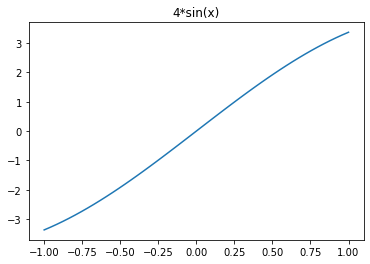

Value counted with Rectangle method -->  -1.7763568394002506e-16
Value counted with Trapeze method -->  -1.7763568394002506e-16
Value counted with Simpson method -->  -0.08858638618581037
Value counted with Gauss-Legendre method with different orders:
	 2  --> 0.0
	 3  --> 0.0
	 4  --> -2.220446049250313e-16
	 5  --> -1.1102230246251565e-16
Actual value --> 0.0
Estimating errors:
For Rectangle method inf
For Trapeze method inf
For Simpson method inf
For Gauss-Legendre method with different orders:
	 2  --> nan
	 3  --> nan
	 4  --> inf
	 5  --> inf


c:\users\andy\pycharmprojects\untitled1\venv\lib\site-packages\ipykernel_launcher.py:75: RuntimeWarning: divide by zero encountered in double_scalars
c:\users\andy\pycharmprojects\untitled1\venv\lib\site-packages\ipykernel_launcher.py:76: RuntimeWarning: divide by zero encountered in double_scalars
c:\users\andy\pycharmprojects\untitled1\venv\lib\site-packages\ipykernel_launcher.py:77: RuntimeWarning: divide by zero encountered in double_scalars
c:\users\andy\pycharmprojects\untitled1\venv\lib\site-packages\ipykernel_launcher.py:79: RuntimeWarning: invalid value encountered in double_scalars
c:\users\andy\pycharmprojects\untitled1\venv\lib\site-packages\ipykernel_launcher.py:80: RuntimeWarning: invalid value encountered in double_scalars
c:\users\andy\pycharmprojects\untitled1\venv\lib\site-packages\ipykernel_launcher.py:81: RuntimeWarning: divide by zero encountered in double_scalars
c:\users\andy\pycharmprojects\untitled1\venv\lib\site-packages\ipykernel_launcher.py:82: RuntimeWarnin

In [13]:
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

def GaussLegendreQuadrature(func, polyorder, a, b):
    x, w = np.polynomial.legendre.leggauss(polyorder)
    t= 0.5*(x + 1)*(b - a) + a
    gauss = sum(w * np.vectorize(func)(t)) * 0.5*(b - a)
    return  gauss


def integrateRectangle(start,end,numberOfPoints,function):
    dx=(end-start)/numberOfPoints
    result=0.0
    for i in range (1,numberOfPoints):
        result+=function(start+i*dx)
    result=(result+((function(start)+function(end))/2))*dx
    return result

def integrateTrapez(start,end,numberOfPoints,function):
    result=0
    dx=(end-start)/numberOfPoints
    for i in range (1,numberOfPoints):
        result+=function(start+i*dx)
    result=(result+(function(start)+function(end))/2)*dx
    return result

def integrateSimpson(start,end,numberOfPoints,function):
    result=0
    middleResult=0
    dx=(end-start)/numberOfPoints
    for i in range (1,numberOfPoints):
        x=start+i*dx
        middleResult+=function(x-dx/2)
        if i<numberOfPoints : result+=function(x)
    result=dx/6*(function(start)+function(end)+2*result+4*middleResult)
    return result


f1 = lambda x: 3 * x**3 - 1
f2 = lambda x: 2 * x**2
f3 = lambda x: 4 * np.sin(x)


        
def show(function,start,end,numberOfPoints,funcName):
    x_array=np.linspace(start,end,num=50)
    y_array=function(x_array)
    plt.title(funcName)
    plt.plot(x_array,y_array)
    plt.show()
    

def showIntegral(function,start,end,numberOfPoints,funcName,order):
    show(function,start,end,numberOfPoints,funcName)
    intRectangle=integrateRectangle(start,end,numberOfPoints,function)
    intTrapeze=integrateTrapez(start,end,numberOfPoints,function)
    intSimpson=integrateSimpson(start,end,numberOfPoints,function)
    intGaussL2=GaussLegendreQuadrature(function, order, start,end)
    intGaussL3=GaussLegendreQuadrature(function, order+1, start,end)
    intGaussL4=GaussLegendreQuadrature(function, order+2, start,end)
    intGaussL5=GaussLegendreQuadrature(function, order+3, start,end)
    intReal=integrate.quad(function,start,end)[0]
    print("Value counted with Rectangle method --> ",intRectangle)
    print("Value counted with Trapeze method --> ",intTrapeze)
    print("Value counted with Simpson method --> ",intSimpson)
    print("Value counted with Gauss-Legendre method with different orders:")
    print("\t",order," -->",intGaussL2)
    print("\t",order+1," -->",intGaussL3)
    print("\t",order+2," -->",intGaussL4)
    print("\t",order+3," -->",intGaussL5)
    print("Actual value -->",intReal)
    print("Estimating errors:")
    print("For Rectangle method",abs(intRectangle-intReal)/abs(intReal))
    print("For Trapeze method",abs(intTrapeze-intReal)/abs(intReal))
    print("For Simpson method",abs(intSimpson-intReal)/abs(intReal))
    print("For Gauss-Legendre method with different orders:")
    print("\t",order," -->",abs(intGaussL2-intReal)/abs(intReal))
    print("\t",order+1," -->",abs(intGaussL3-intReal)/abs(intReal))
    print("\t",order+2," -->",abs(intGaussL4-intReal)/abs(intReal))
    print("\t",order+3," -->",abs(intGaussL5-intReal)/abs(intReal))
    

#Comparing methods 
start=-1
end=1
numberOfPoints=50
startOrder=2
print("Integral in range [-1,1]")
showIntegral(f1,start,end,numberOfPoints," 3 * x^3 - 1",startOrder)
showIntegral(f2,start,end,numberOfPoints,"2 * x^2",startOrder)
showIntegral(f3,start,end,numberOfPoints,"4*sin(x)",startOrder)

Integral in range [1,100]
None


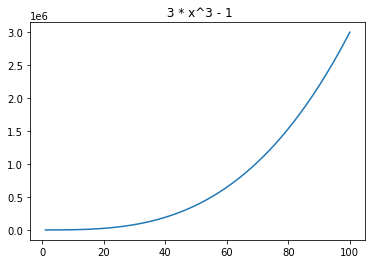

Value counted with Rectangle method -->  75029300.3097
Value counted with Trapeze method -->  75029300.3097
Value counted with Simpson method -->  71156353.05358405
Value counted with Gauss-Legendre method with different orders:
	 2  --> 74999900.25
	 3  --> 74999900.25000003
	 4  --> 74999900.24999997
	 5  --> 74999900.25000003
Actual value --> 74999900.25
Estimating errors:
For Rectangle method 0.0003920013173617162
For Trapeze method 0.0003920013173617162
For Simpson method 0.05124736411120688
For Gauss-Legendre method with different orders:
	 2  --> 0.0
	 3  --> 3.973648269978241e-16
	 4  --> 3.973648269978241e-16
	 5  --> 3.973648269978241e-16


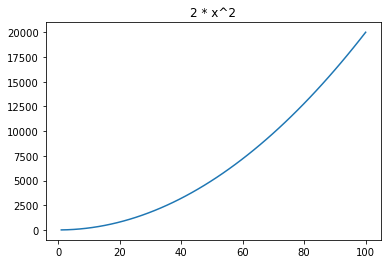

Value counted with Rectangle method -->  666795.3732
Value counted with Trapeze method -->  666795.3732
Value counted with Simpson method -->  640786.1325360001
Value counted with Gauss-Legendre method with different orders:
	 2  --> 666666.0
	 3  --> 666666.0000000002
	 4  --> 666665.9999999998
	 5  --> 666666.0000000002
Actual value --> 666666.0
Estimating errors:
For Rectangle method 0.00019405999406004045
For Trapeze method 0.00019405999406004045
For Simpson method 0.03881984001583986
For Gauss-Legendre method with different orders:
	 2  --> 0.0
	 3  --> 3.492463147271192e-16
	 4  --> 3.492463147271192e-16
	 5  --> 3.492463147271192e-16


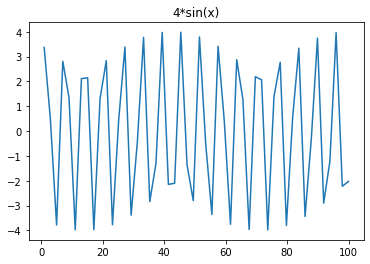

Value counted with Rectangle method -->  -0.8369134795412362
Value counted with Trapeze method -->  -0.8369134795412362
Value counted with Simpson method -->  3.97761180742715
Value counted with Gauss-Legendre method with different orders:
	 2  --> -87.78668869773688
	 3  --> 81.79795111342175
	 4  --> -19.264891193956448
	 5  --> 42.34368557462116
Actual value --> -1.2880662656781041
Estimating errors:
For Rectangle method 0.3502558821376771
For Trapeze method 0.3502558821376771
For Simpson method 4.088049049505331
For Gauss-Legendre method with different orders:
	 2  --> 67.15386058691745
	 3  --> 64.5044588100901
	 4  --> 13.9564441731687
	 5  --> 33.87384096836763


In [14]:
#Different range [1,100]
start=1
end=100
numberOfPoints=50
startOrder=2
print(print("Integral in range [1,100]"))
showIntegral(f1,start,end,numberOfPoints," 3 * x^3 - 1",startOrder)
showIntegral(f2,start,end,numberOfPoints,"2 * x^2",startOrder)
showIntegral(f3,start,end,numberOfPoints,"4*sin(x)",startOrder)

Integral in range [-5,10]
None


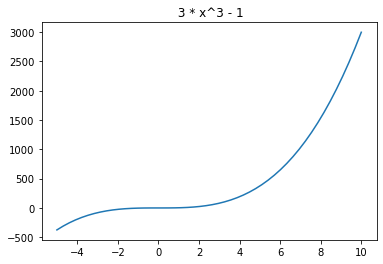

Value counted with Rectangle method -->  7021.3125
Value counted with Trapeze method -->  7021.3125
Value counted with Simpson method -->  6443.047024999998
Value counted with Gauss-Legendre method with different orders:
	 2  --> 7016.249999999998
	 3  --> 7016.250000000004
	 4  --> 7016.249999999996
	 5  --> 7016.250000000002
Actual value --> 7016.25
Estimating errors:
For Rectangle method 0.0007215392838054517
For Trapeze method 0.0007215392838054517
For Simpson method 0.08169648672724061
For Gauss-Legendre method with different orders:
	 2  --> 2.5925378992280156e-16
	 3  --> 5.185075798456031e-16
	 4  --> 5.185075798456031e-16
	 5  --> 2.5925378992280156e-16


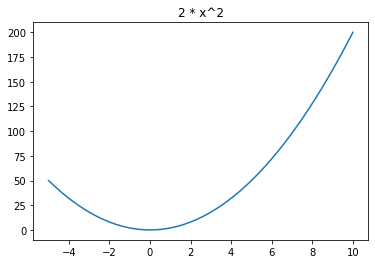

Value counted with Rectangle method -->  750.4499999999997
Value counted with Trapeze method -->  750.4499999999997
Value counted with Simpson method -->  711.1909999999997
Value counted with Gauss-Legendre method with different orders:
	 2  --> 749.9999999999999
	 3  --> 750.0000000000002
	 4  --> 749.9999999999998
	 5  --> 750.0000000000002
Actual value --> 750.0
Estimating errors:
For Rectangle method 0.0005999999999996058
For Trapeze method 0.0005999999999996058
For Simpson method 0.05174533333333375
For Gauss-Legendre method with different orders:
	 2  --> 1.5158245029548803e-16
	 3  --> 3.0316490059097607e-16
	 4  --> 3.0316490059097607e-16
	 5  --> 3.0316490059097607e-16


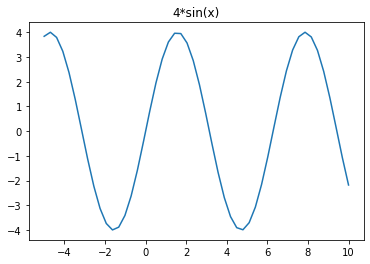

Value counted with Rectangle method -->  4.457202215197616
Value counted with Trapeze method -->  4.457202215197616
Value counted with Simpson method -->  4.820965969159168
Value counted with Gauss-Legendre method with different orders:
	 2  --> -13.394529144561915
	 3  --> 33.711573139369484
	 4  --> -7.136500682992852
	 5  --> 6.900974875875552
Actual value --> 4.490934858158714
Estimating errors:
For Rectangle method 0.007511274161506907
For Trapeze method 0.007511274161506907
For Simpson method 0.07348828727739931
For Gauss-Legendre method with different orders:
	 2  --> 3.9825703484048485
	 3  --> 6.506582527717013
	 4  --> 2.5890902247285816
	 5  --> 0.5366455078586814


In [15]:
#Different range[-5,10]
start=-5
end=10
numberOfPoints=50
startOrder=2
print(print("Integral in range [-5,10]"))
showIntegral(f1,start,end,numberOfPoints," 3 * x^3 - 1",startOrder)
showIntegral(f2,start,end,numberOfPoints,"2 * x^2",startOrder)
showIntegral(f3,start,end,numberOfPoints,"4*sin(x)",startOrder)